In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

50000 training images and 10000 test images

In [4]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array convert this to now 1D array

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
def plot_image(image, img, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('summer'))
    plt.title(f"Class: {img}")
    plt.xticks([])
    plt.yticks([])

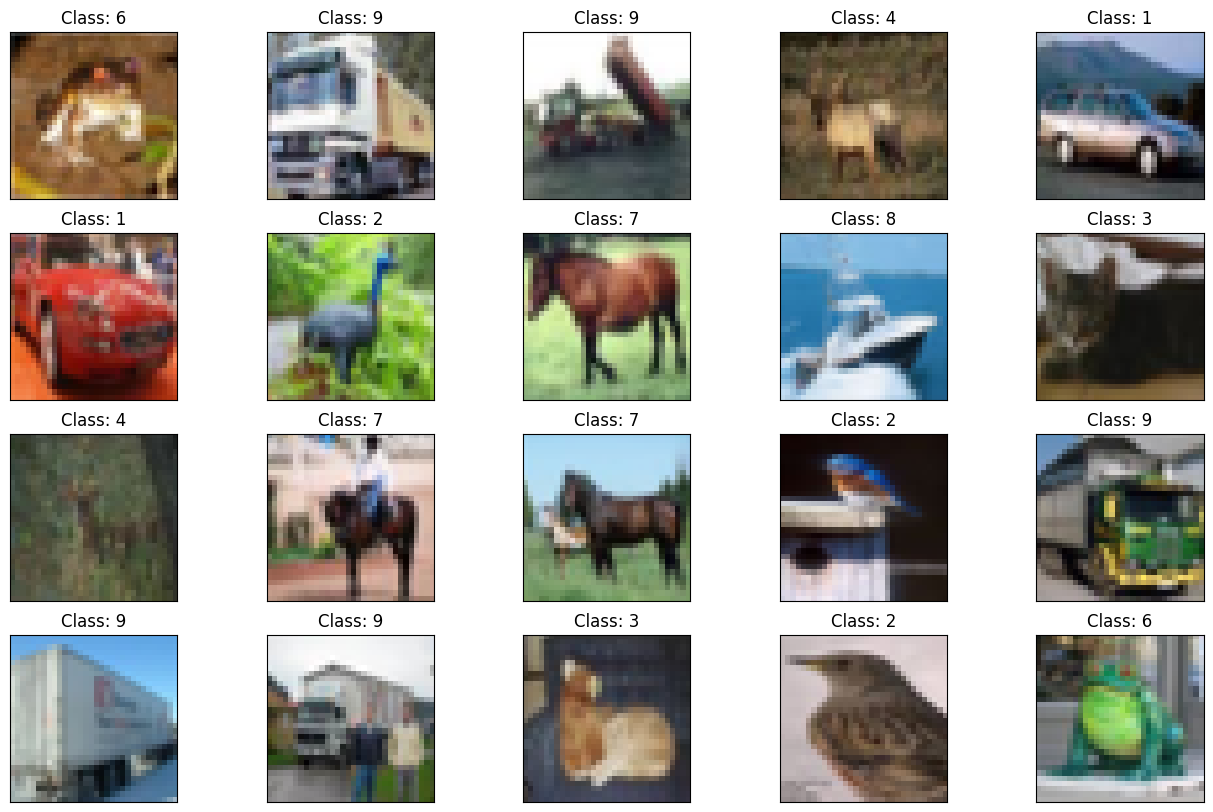

In [8]:
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_image(X_train[i],y_train[i],plt,i)
plt.show()

Normalizing traning data from 0 to 1. RGB channels range from 0 to 255

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit Model and Iterations

In [ ]:
fitted = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4376 - accuracy: 0.4856 - val_loss: 1.1775 - val_accuracy: 0.5920
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0812 - accuracy: 0.6221 - val_loss: 1.0730 - val_accuracy: 0.6205
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9477 - accuracy: 0.6697 - val_loss: 0.9734 - val_accuracy: 0.6545
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8643 - accuracy: 0.7005 - val_loss: 0.9286 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7912 - accuracy: 0.7259 - val_loss: 0.8862 - val_accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7370 - accuracy: 0.7442 - val_loss: 0.9086 - val_accuracy: 0.6906
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6830 - accuracy: 0.7603 - val_loss: 0.9087 -

Evaluate the Model

In [ ]:
test_loss, test_accuracy = cnn.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()